# Proyek Analisis E-Commerce Public Dataset
- Nama: Ricky Hermanto
- Email: ricky.hermanto2593@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- What is the overall growth rate of total orders from January to August  
  between 2017 and 2018?
- Which specific months exhibit the highest and lowest number of orders in the
  dataset?
- What is the distribution of orders across different days of the week, and are
  there specific days that consistently show higher order frequencies?
- Is there any specific factor('product_category_name', 'payment_type',
  'review_score') who has contribute significantly in the order frequency ?

## Menyiapkan semua library yang dibuthkan

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import skew
from scipy.stats import skewtest
import pylab as p
from itertools import combinations
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from scipy.stats import skew
from scipy.stats import skewtest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
from IPython.display import display

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
customers = pd.read_csv('/content/drive/MyDrive/IDCamp/materi 4/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/IDCamp/materi 4/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/IDCamp/materi 4/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/IDCamp/materi 4/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/IDCamp/materi 4/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/IDCamp/materi 4/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')

### Assessing Data

In [4]:
# Create a list of datasets and their respective names
datasets = [
    ('Customers', customers),
    ('Orders', orders),
    ('Order Items', order_items),
    ('Products', products),
    ('Order Payments', order_payments),
    ('Order Reviews', order_reviews)
]

# Initialize an empty list to store individual dataframes
summary_dfs = []

# Populate the summary dataframes
for dataset_name, dataset_df in datasets:
    summary_df = pd.DataFrame(columns=['Column Name', 'Null Amount', 'Null Percentage', 'Data Type', 'Total Categorical Entries'])
    for column in dataset_df.columns:
        null_amount = dataset_df[column].isnull().sum()
        null_percentage = (null_amount / len(dataset_df)) * 100
        data_type = dataset_df[column].dtype
        total_categorical_entries = len(dataset_df[column].unique()) if data_type == 'object' else None

        summary_df = pd.concat([summary_df, pd.DataFrame({
            'Column Name': [column],
            'Null Amount': [null_amount],
            'Null Percentage': [null_percentage],
            'Data Type': [data_type],
            'Total Categorical Entries': [total_categorical_entries]
        })], ignore_index=True)

    # Add a column for the dataset name
    summary_df['Dataset'] = dataset_name

    # Reorder columns
    summary_df = summary_df[['Dataset', 'Column Name', 'Null Amount', 'Null Percentage', 'Data Type', 'Total Categorical Entries']]

    # Append the summary dataframe to the list
    summary_dfs.append(summary_df)

# Concatenate all summary dataframes into a single dataframe
final_summary_df = pd.concat(summary_dfs, ignore_index=True)

# Concatenate all summary dataframes into a single dataframe
final_summary_df = pd.concat(summary_dfs, ignore_index=True)

# Display the final summary dataframe as a table
display(final_summary_df)

,Dataset,Column Name,Null Amount,Null Percentage,Data Type,Total Categorical Entries
0,Customers,customer_id,0,0.000000,object,99441
1,Customers,customer_unique_id,0,0.000000,object,96096
2,Customers,customer_zip_code_prefix,0,0.000000,int64,None
3,Customers,customer_city,0,0.000000,object,4119
4,Customers,customer_state,0,0.000000,object,27
5,Orders,order_id,0,0.000000,object,99441
6,Orders,customer_id,0,0.000000,object,99441
7,Orders,order_status,0,0.000000,object,8
8,Orders,order_purchase_timestamp,0,0.000000,object,98875
9,Orders,order_approved_at,160,0.160899,object,90734


We can see in the dataframe that there are several columns or features that have missing values, some < 1%, and some up to > 50%. and there are also several features whose data type is not appropriate, such as "order_purchase_timestamp" where it is said that the data type is object, these features should have the data type datetime. Some adjustments will be made later

In [5]:
# Merge datasets
ecommerce = pd.merge(orders, customers, on='customer_id')
ecommerce = pd.merge(ecommerce, order_items, on='order_id')
ecommerce = pd.merge(ecommerce, products, on='product_id')
ecommerce = pd.merge(ecommerce, order_payments, on='order_id')
ecommerce = pd.merge(ecommerce, order_reviews, on='order_id')

# Display the merged DataFrame
ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


### Cleaning Data

to handle missing values, for features with < 10% a fill will be done with method = "most-frequent", and for features with missing values ​​> 50% a drop column will be done

In [6]:
columns_to_drop = ['review_comment_title', 'review_comment_message']
ecommerce = ecommerce.drop(columns=columns_to_drop)

ecommerce['order_approved_at'] = ecommerce['order_approved_at'].fillna(ecommerce['order_approved_at'].mode()[0])
ecommerce['order_delivered_carrier_date'] = ecommerce['order_delivered_carrier_date'].fillna(ecommerce['order_delivered_carrier_date'].mode()[0])
ecommerce['order_delivered_customer_date'] = ecommerce['order_delivered_customer_date'].fillna(ecommerce['order_delivered_customer_date'].mode()[0])
ecommerce['product_category_name'] = ecommerce['product_category_name'].fillna(ecommerce['product_category_name'].mode()[0])
ecommerce['product_name_lenght'] = ecommerce['product_name_lenght'].fillna(ecommerce['product_name_lenght'].mode()[0])
ecommerce['product_description_lenght'] = ecommerce['product_description_lenght'].fillna(ecommerce['product_description_lenght'].mode()[0])
ecommerce['product_photos_qty'] = ecommerce['product_photos_qty'].fillna(ecommerce['product_photos_qty'].mode()[0])
ecommerce['product_weight_g'] = ecommerce['product_weight_g'].fillna(ecommerce['product_weight_g'].mode()[0])
ecommerce['product_length_cm'] = ecommerce['product_length_cm'].fillna(ecommerce['product_length_cm'].mode()[0])
ecommerce['product_height_cm'] = ecommerce['product_height_cm'].fillna(ecommerce['product_height_cm'].mode()[0])
ecommerce['product_width_cm'] = ecommerce['product_width_cm'].fillna(ecommerce['product_width_cm'].mode()[0])


In [7]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date',
                 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

ecommerce[date_columns] = ecommerce[date_columns].apply(pd.to_datetime)
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117329 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117329 non-null  datetime64[ns]
 6   order_delivered_customer_date  117329 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   customer_unique_id             117329 non-null  object        
 9   customer_zip_code_prefix       117329 non-null  int64         
 10  customer_city                  117329 non-null  object        
 11  

## Exploratory Data Analysis (EDA)

### Explore ...

### Univariat Analysis

In [14]:
ecommerce.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score,order_purchase_year,order_purchase_month,order_purchase_hour
count,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,35060.118112,1.194121,120.524349,20.027514,48.915835,779.376991,2.188112,2110.437351,30.252026,16.611349,23.070929,1.094452,2.940151,172.062565,4.031467,2017.537591,6.027197,14.760272
std,29849.496175,0.684225,182.944843,15.828077,10.035633,649.824555,1.711386,3784.888510,16.177210,13.451755,11.744942,0.731174,2.775370,265.388194,1.387927,0.505092,3.229835,5.323261
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000,2016.000000,1.000000,0.000000
25%,11250.000000,1.000000,39.900000,13.080000,43.000000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.750000,4.000000,2017.000000,3.000000,11.000000
50%,24240.000000,1.000000,74.900000,16.280000,52.000000,594.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.100000,5.000000,2018.000000,6.000000,15.000000
75%,58770.000000,1.000000,134.900000,21.180000,57.000000,976.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.060000,5.000000,2018.000000,8.000000,19.000000
max,99990.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,5.000000,2018.000000,12.000000,23.000000


Result of interpret a few key statistics from .describe()

1. price: The average price is around Real(***The Brazilian real is the official currency of Brazil***)120.52, with a minimum of Real0.85 and a maximum of Real6735. The standard deviation is relatively high, indicating variability in prices.

2. freight_value: The average freight cost is around Real20.03, with a minimum of
Real0 and a maximum of Real409.68.

3. product_weight_g: The average product weight is around 2110.44 grams, with a minimum of 0 grams and a maximum of 40425 grams.

4. payment_installments: The average number of payment installments is approximately 2.94, with a minimum of 1 and a maximum of 29.

5. review_score: The average review score is around 4.03, with a minimum of 1 and a maximum of 5.

In [13]:
ecommerce_number = ecommerce.select_dtypes(include = 'number')
ecommerce_number.columns

Index(['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score',
       'order_purchase_year', 'order_purchase_month', 'order_purchase_hour'],
      dtype='object')

#### Univariat Analysis, Outliers Detection, Skewness Test

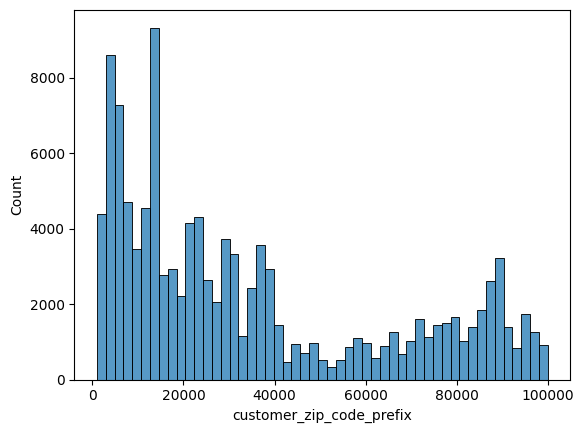

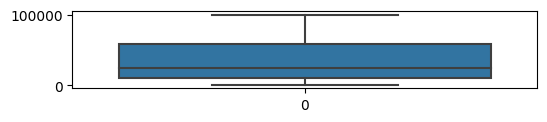

count    117329.000000
mean      35060.118112
std       29849.496175
min        1003.000000
25%       11250.000000
50%       24240.000000
75%       58770.000000
max       99990.000000
Name: customer_zip_code_prefix, dtype: float64
upperlimit: 99990
lowerlimit: 1003
outlier: count: 0 proportion: 0.0 list: []
skew:0.7841996369654429
skewtest:SkewtestResult(statistic=97.4158893191499, pvalue=0.0)


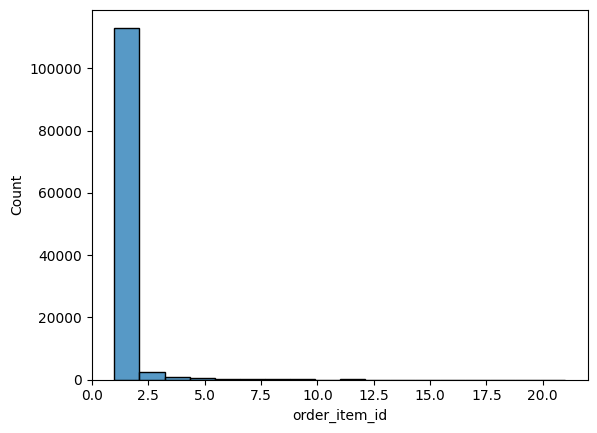

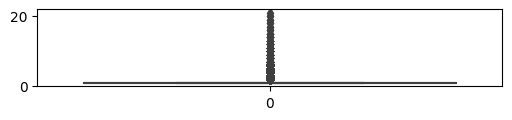

count    117329.000000
mean          1.194121
std           0.684225
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64
upperlimit: 1
lowerlimit: 1
outlier: count: 14466 proportion: 0.1232943262109112 list: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 4, 5, 6, 2, 3, 2,

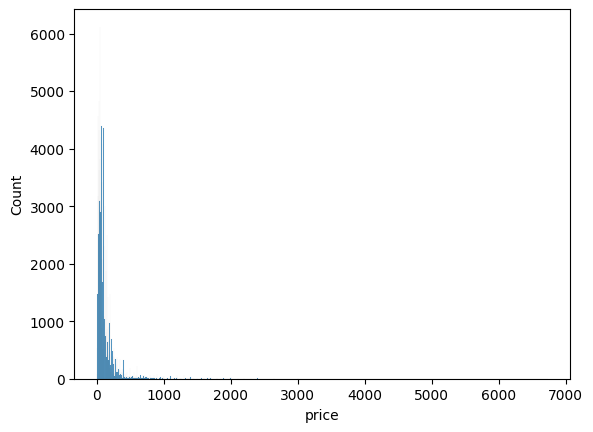

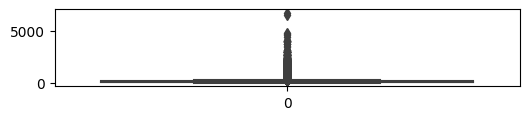

count    117329.000000
mean        120.524349
std         182.944843
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64
upperlimit: 277.3
lowerlimit: 0.85
outlier: count: 8785 proportion: 0.07487492435800186 list: [1299.0, 1299.0, 1499.0, 1050.0, 279.0, 445.0, 440.0, 440.0, 440.0, 339.0, 369.0, 299.99, 369.0, 369.0, 299.99, 369.0, 285.0, 299.0, 449.0, 329.9, 329.9, 544.0, 394.9, 349.9, 759.0, 535.9, 527.9, 529.9, 529.65, 529.9, 527.9, 527.9, 527.9, 499.9, 549.9, 550.9, 527.9, 550.9, 527.9, 527.9, 529.9, 527.9, 649.65, 529.9, 550.9, 529.9, 549.9, 589.9, 299.9, 281.99, 299.0, 359.9, 410.0, 398.0, 398.0, 410.0, 410.0, 410.0, 410.0, 398.0, 410.0, 410.0, 410.0, 398.0, 398.0, 410.0, 410.0, 398.0, 397.0, 359.5, 365.0, 679.0, 669.99, 679.0, 679.0, 669.99, 289.9, 289.9, 289.9, 289.9, 289.9, 279.99, 279.99, 428.0, 388.0, 388.0, 388.0, 388.0, 379.9, 388.0, 388.0, 388.0, 428.0, 388.0, 388.0, 320.0, 320.0, 3

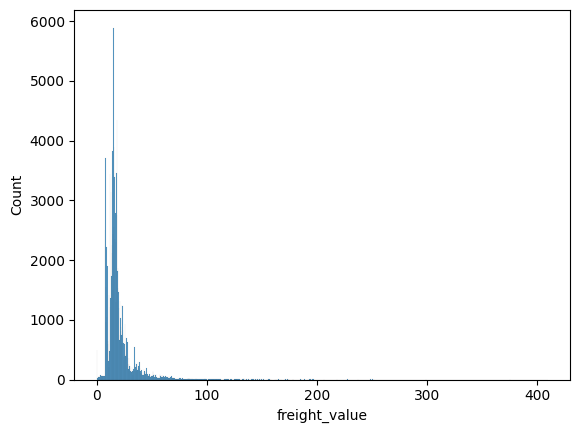

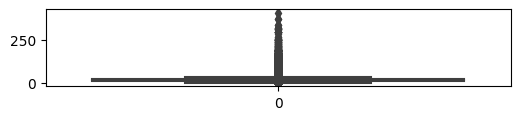

count    117329.000000
mean         20.027514
std          15.828077
min           0.000000
25%          13.080000
50%          16.280000
75%          21.180000
max         409.680000
Name: freight_value, dtype: float64
upperlimit: 33.33
lowerlimit: 0.96
outlier: count: 12635 proportion: 0.10768863622804252 list: [51.32, 34.7, 34.7, 34.5, 34.5, 34.56, 59.29, 40.07, 34.42, 34.63, 41.08, 41.08, 39.95, 89.82, 37.92, 41.01, 41.08, 41.08, 41.1, 45.99, 45.99, 45.99, 37.92, 37.92, 37.92, 54.89, 38.53, 41.01, 41.01, 41.08, 37.92, 39.93, 41.08, 41.08, 46.01, 35.06, 37.99, 40.06, 69.33, 41.1, 37.99, 37.99, 41.08, 51.75, 45.99, 45.99, 45.99, 37.99, 37.99, 43.06, 34.99, 37.92, 37.92, 45.99, 45.99, 41.01, 35.06, 41.08, 34.99, 37.92, 79.76, 67.02, 36.7, 69.4, 39.79, 41.01, 53.54, 34.99, 73.54, 43.24, 41.08, 37.92, 41.08, 45.99, 52.71, 52.72, 37.92, 37.99, 37.99, 38.53, 38.53, 45.99, 38.53, 38.53, 54.3, 52.48, 84.07, 104.66, 92.28, 90.57, 37.04, 185.73, 185.73, 35.95, 38.99, 0.0, 37.47, 34.43, 35.95,

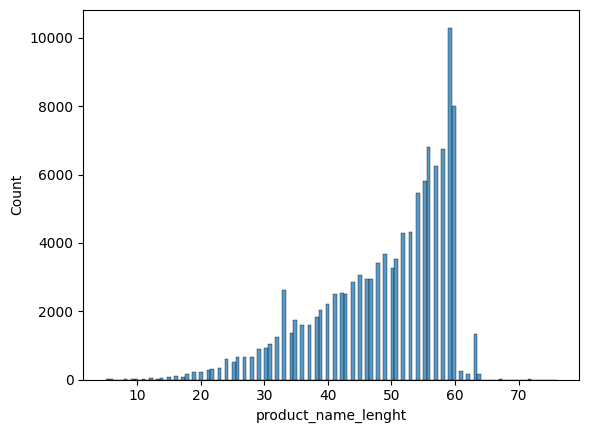

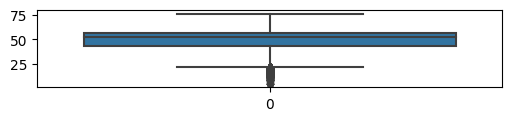

count    117329.000000
mean         48.915835
std          10.035633
min           5.000000
25%          43.000000
50%          52.000000
75%          57.000000
max          76.000000
Name: product_name_lenght, dtype: float64
upperlimit: 76.0
lowerlimit: 22.0
outlier: count: 1294 proportion: 0.011028816405151326 list: [19.0, 19.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 20.0, 20.0, 18.0, 20.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 1

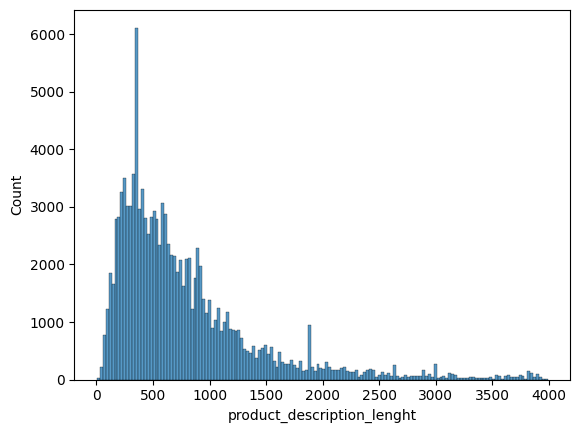

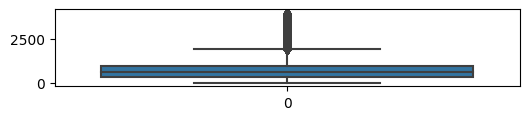

count    117329.000000
mean        779.376991
std         649.824555
min           4.000000
25%         341.000000
50%         594.000000
75%         976.000000
max        3992.000000
Name: product_description_lenght, dtype: float64
upperlimit: 1928.0
lowerlimit: 4.0
outlier: count: 7377 proportion: 0.06287448115981556 list: [2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2574.0, 2345.0, 2345.0, 2345.0, 2435.0, 2188.0, 1953.0, 2188.0, 2188.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 2432.0, 3270.0, 3270.0, 3270.0, 3270.0, 3270.0, 3270.0, 3270.0, 3270.0, 3270.0, 3270.0, 2440.0, 2440.0, 

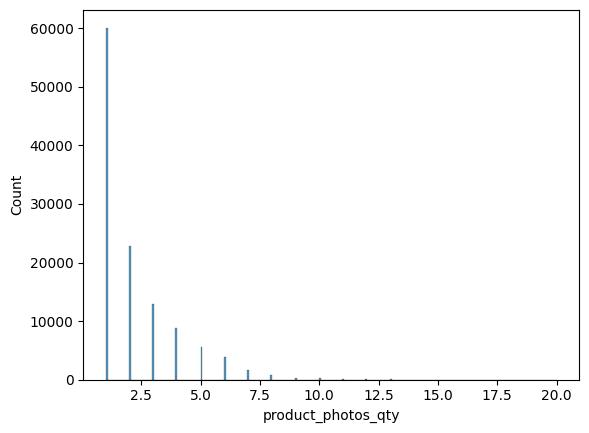

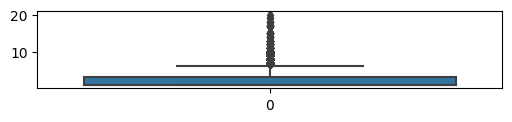

count    117329.000000
mean          2.188112
std           1.711386
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          20.000000
Name: product_photos_qty, dtype: float64
upperlimit: 6.0
lowerlimit: 1.0
outlier: count: 3184 proportion: 0.02713736586862583 list: [8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 8.0, 8.0, 8.0, 8.0, 7.0, 9.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 8.0, 7.0, 9.0, 7.0, 7.0, 9.0, 9.0, 9.0, 9.0, 9.0, 7.0, 7.0, 9.0, 9.0, 9.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 18.0, 18.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.

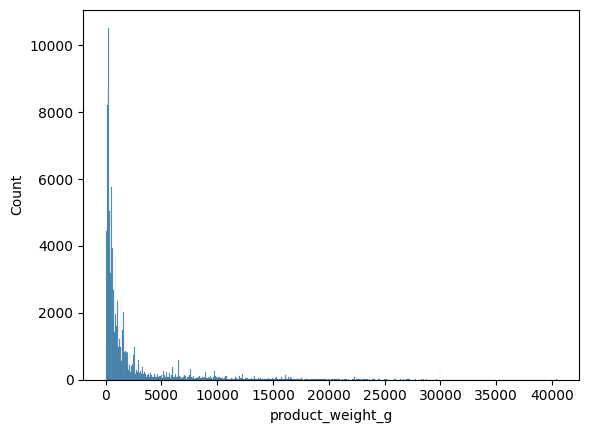

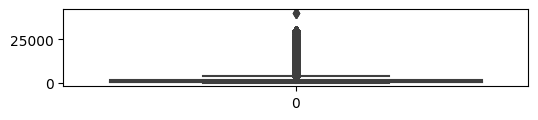

count    117329.000000
mean       2110.437351
std        3784.888510
min           0.000000
25%         300.000000
50%         700.000000
75%        1800.000000
max       40425.000000
Name: product_weight_g, dtype: float64
upperlimit: 4050.0
lowerlimit: 0.0
outlier: count: 16547 proportion: 0.14103077670482148 list: [7150.0, 7150.0, 6400.0, 7150.0, 7150.0, 7150.0, 6400.0, 7150.0, 7150.0, 7150.0, 7150.0, 7150.0, 6400.0, 7150.0, 7150.0, 7150.0, 7150.0, 6400.0, 7150.0, 7150.0, 7150.0, 7150.0, 6400.0, 7150.0, 6400.0, 7150.0, 7150.0, 7150.0, 7150.0, 7150.0, 7150.0, 7150.0, 7150.0, 9750.0, 9750.0, 9750.0, 9750.0, 9750.0, 9750.0, 9750.0, 9750.0, 9750.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9000.0, 9

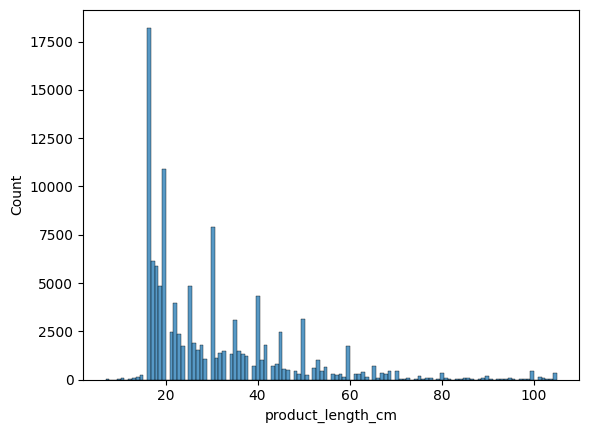

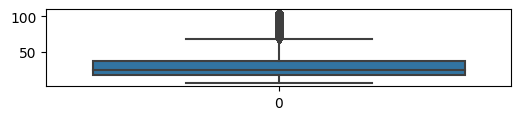

count    117329.000000
mean         30.252026
std          16.177210
min           7.000000
25%          18.000000
50%          25.000000
75%          38.000000
max         105.000000
Name: product_length_cm, dtype: float64
upperlimit: 68.0
lowerlimit: 7.0
outlier: count: 3780 proportion: 0.032217098926949 list: [100.0, 100.0, 100.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 69.0, 90.0, 69.0, 100.0, 73.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 102.0, 90.0, 90.0, 73.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 105.0, 105.0, 105.0, 105.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 102.0, 102.0,

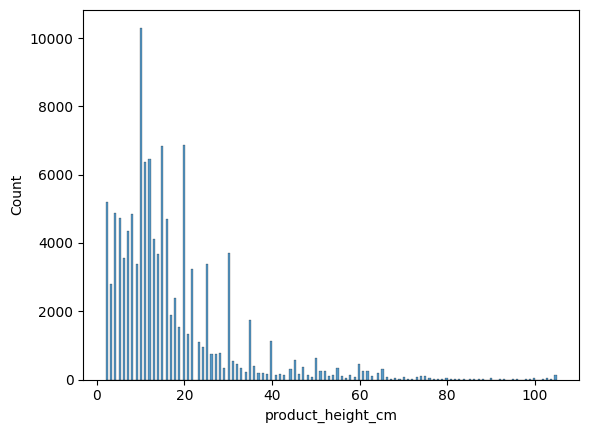

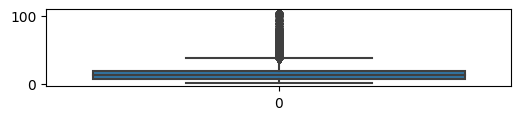

count    117329.000000
mean         16.611349
std          13.451755
min           2.000000
25%           8.000000
50%          13.000000
75%          20.000000
max         105.000000
Name: product_height_cm, dtype: float64
upperlimit: 38.0
lowerlimit: 2.0
outlier: count: 8030 proportion: 0.06844002761465623 list: [40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 75.0, 40.0, 40.0, 70.0, 50.0, 50.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 65.0, 65.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 47.0, 47.0, 47.0, 73.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0,

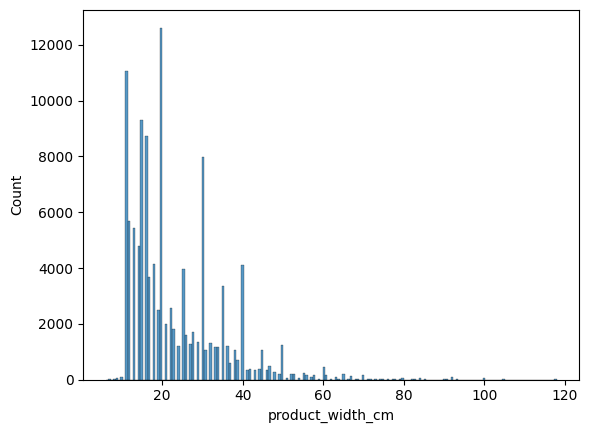

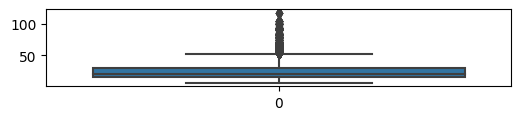

count    117329.000000
mean         23.070929
std          11.744942
min           6.000000
25%          15.000000
50%          20.000000
75%          30.000000
max         118.000000
Name: product_width_cm, dtype: float64
upperlimit: 52.0
lowerlimit: 6.0
outlier: count: 2726 proportion: 0.023233812612397618 list: [65.0, 65.0, 63.0, 65.0, 65.0, 65.0, 63.0, 65.0, 65.0, 65.0, 65.0, 65.0, 63.0, 65.0, 65.0, 65.0, 65.0, 63.0, 65.0, 65.0, 65.0, 65.0, 63.0, 65.0, 63.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 61.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 74.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 57.0, 57.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0,

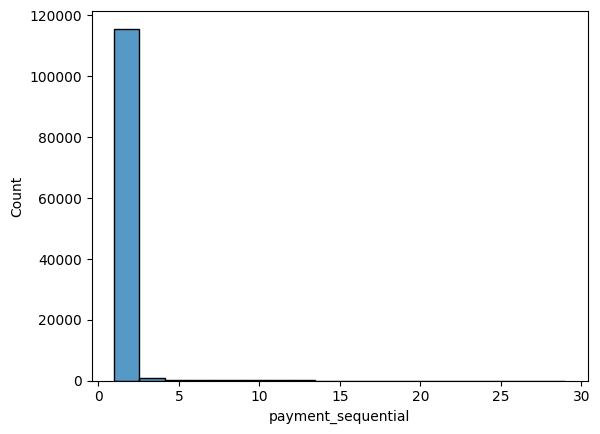

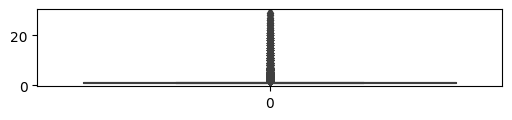

count    117329.000000
mean          1.094452
std           0.731174
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          29.000000
Name: payment_sequential, dtype: float64
upperlimit: 1
lowerlimit: 1
outlier: count: 5048 proportion: 0.043024316238952004 list: [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 6, 2, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 4, 2, 3, 6, 11, 8, 12, 9, 7, 10, 5, 4, 2, 3, 6, 11, 8, 12, 9, 7, 10, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 5, 2, 4, 6, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 2, 3, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 6, 7, 5, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 7, 2, 4, 8, 3, 6, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

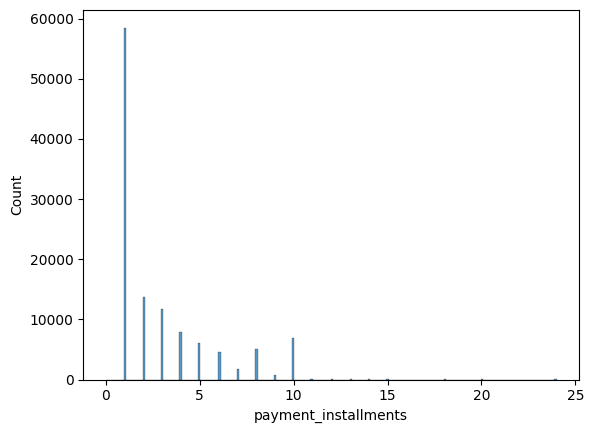

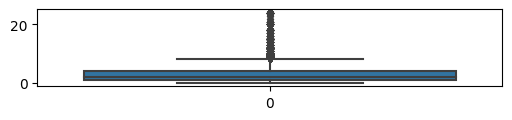

count    117329.000000
mean          2.940151
std           2.775370
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64
upperlimit: 8
lowerlimit: 0
outlier: count: 7983 proportion: 0.0680394446385804 list: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 9, 10, 9, 10, 10, 10, 10, 10, 9, 10, 9, 10, 10, 10, 10, 10, 10, 10, 9, 13, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 9, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 10, 9, 10, 10, 15, 10, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

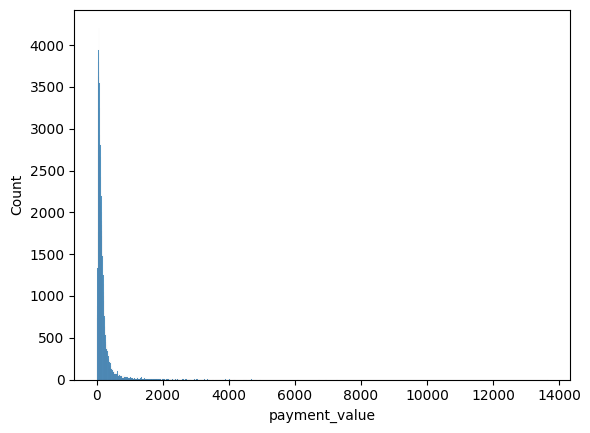

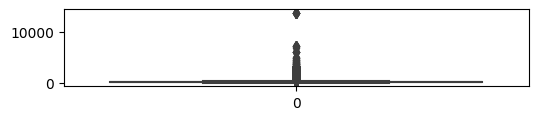

count    117329.000000
mean        172.062565
std         265.388194
min           0.000000
25%          60.750000
50%         108.100000
75%         189.060000
max       13664.080000
Name: payment_value, dtype: float64
upperlimit: 381.51
lowerlimit: 0.0
outlier: count: 9455 proportion: 0.08058536252759335 list: [396.24, 396.24, 396.24, 1586.47, 1391.28, 1589.57, 1501.45, 1501.45, 396.22, 396.22, 413.83, 413.83, 417.37, 417.37, 508.17, 466.01, 451.44, 459.05, 421.47, 421.47, 421.47, 573.85, 573.85, 573.85, 573.85, 573.85, 386.33, 383.08, 386.33, 386.33, 410.38, 410.38, 388.24, 388.24, 394.94, 394.94, 604.84, 604.84, 604.84, 604.84, 604.84, 604.84, 604.84, 604.84, 408.1, 408.1, 653.21, 653.21, 384.86, 384.86, 416.08, 416.08, 387.44, 387.44, 414.08, 414.08, 441.16, 441.16, 824.76, 824.76, 392.6, 392.6, 392.6, 392.6, 408.12, 408.12, 408.12, 408.12, 421.12, 421.12, 421.12, 421.12, 622.99, 622.99, 622.99, 449.74, 449.74, 964.76, 964.76, 964.76, 964.76, 1988.55, 1988.55, 1988.55, 1988.55, 19

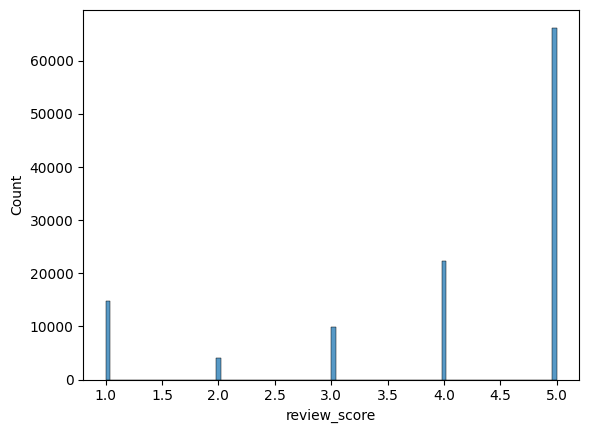

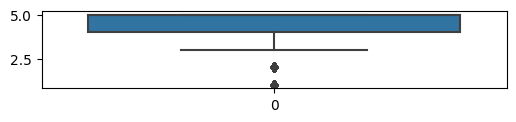

count    117329.000000
mean          4.031467
std           1.387927
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64
upperlimit: 5
lowerlimit: 3
outlier: count: 18939 proportion: 0.1614178932744675 list: [1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 

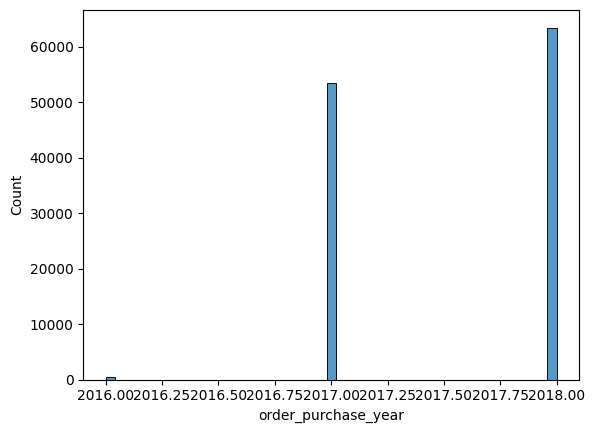

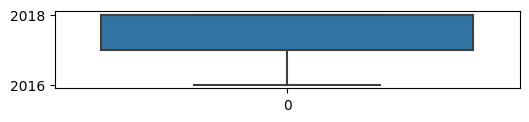

count    117329.000000
mean       2017.537591
std           0.505092
min        2016.000000
25%        2017.000000
50%        2018.000000
75%        2018.000000
max        2018.000000
Name: order_purchase_year, dtype: float64
upperlimit: 2018
lowerlimit: 2016
outlier: count: 0 proportion: 0.0 list: []
skew:-0.22675214545214803
skewtest:SkewtestResult(statistic=-31.316717247203723, pvalue=2.7633534566418075e-215)


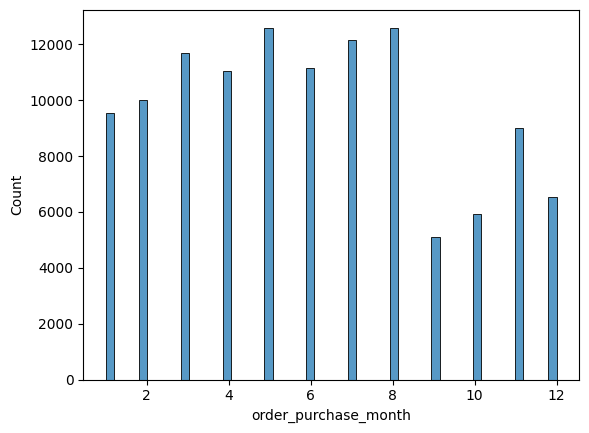

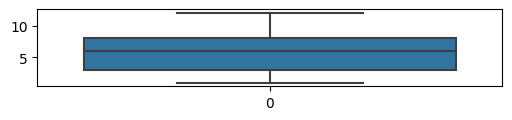

count    117329.000000
mean          6.027197
std           3.229835
min           1.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          12.000000
Name: order_purchase_month, dtype: float64
upperlimit: 12
lowerlimit: 1
outlier: count: 0 proportion: 0.0 list: []
skew:0.20695551974713525
skewtest:SkewtestResult(statistic=28.641003565848013, pvalue=2.0749312322803216e-180)


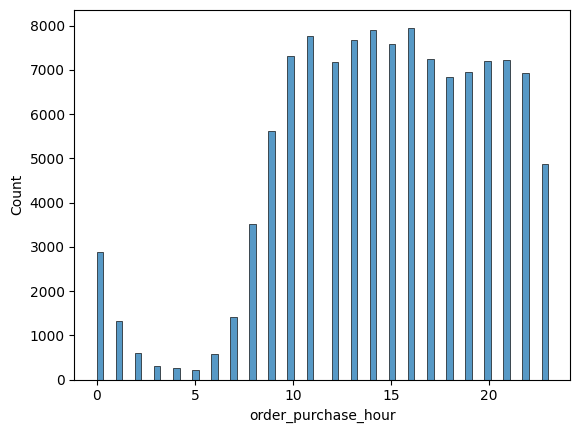

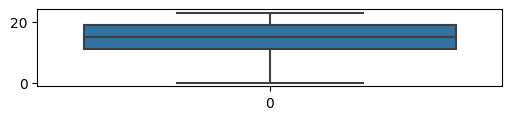

count    117329.000000
mean         14.760272
std           5.323261
min           0.000000
25%          11.000000
50%          15.000000
75%          19.000000
max          23.000000
Name: order_purchase_hour, dtype: float64
upperlimit: 23
lowerlimit: 0
outlier: count: 0 proportion: 0.0 list: []
skew:-0.6011481067982458
skewtest:SkewtestResult(statistic=-77.88811045991234, pvalue=0.0)


In [15]:
for x in ecommerce_number.columns:
    # histogram
    sns.histplot(ecommerce_number[x])
    plt.show()

    # boxplot
    plt.figure(figsize = (6,1))
    sns.boxplot(ecommerce_number[x])
    plt.show()

    # statistic metrics
    print(ecommerce_number[x].describe())
    q1 = np.percentile(ecommerce_number[x], 25)
    q3 = np.percentile(ecommerce_number[x], 75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    upperlimit = np.max(ecommerce_number[x][ecommerce_number[x]<=upperbound])
    lowerlimit = np.min(ecommerce_number[x][ecommerce_number[x]>=lowerbound])
    print('upperlimit: {}'.format(upperlimit))
    print('lowerlimit: {}'.format(lowerlimit))
    outlier = ecommerce_number[x][(ecommerce_number[x]>upperbound) | (ecommerce_number[x]<lowerbound)]
    print('outlier: count: {} proportion: {} list: {}'.format(len(outlier), len(outlier)/len(ecommerce_number[x]), list(outlier)))
    print('skew:{}'.format(skew(ecommerce_number[x])))
    print('skewtest:{}'.format(skewtest(ecommerce_number[x])))

summary all of the plot :
1. Among the 18 data instances (examples), most of them exhibit a right-skewed distribution (15 out of 18).
2. Only 3 instances show a left-skewed distribution.
3. Boxplot analysis reveals that 14 instances have heavy outliers.


for efficiency i will take one of the plot as example for explanation.
i choose plot of column **'Price'** as example.

1. **Descriptive Statistics**:

 The 'price' column represents the prices of ordered items.
The average price is $120.52, with a minimum of $0.85 and a maximum of $6735.
The data is highly right-skewed, as indicated by the positive skewness value of approximately 7.65. This suggests a concentration of lower-priced items and a long tail on the higher-priced side.

2. **Outliers:**

 The upper limit for identifying potential outliers using the 1.5*IQR rule is calculated as $277.3, and the lower limit is $0.85.
There are 8785 potential outliers, representing approximately 7.49% of the data.
Outliers are significant, as they extend beyond the upper limit.


3. **Skewness Test**

 Skewness Value (7.65):
 -  A positive skewness value indicates a right-skewed distribution, meaning that the tail on the right side of the distribution is longer or fatter than the left side.
 -  In this case, the large positive skewness value (7.65) suggests a substantial concentration of lower-priced items with a long tail of higher-priced items.

  Skewness Test Result (statistic=335.01, pvalue=0.0):
 -  The skewness test is used to assess whether the observed skewness in the data is statistically significant or could occur by random chance.
 -  The extremely low p-value of 0.0 indicates strong evidence against the null hypothesis that the data is normally distributed.
 -  The high test statistic (335.01) further supports the conclusion that the skewness in the 'price' data is not likely due to random variability.

  ***Interpretation of this skew test:***

 -  The 'price' data is highly right-skewed, with a significant departure from a normal distribution.
 -  The skewness test reinforces that the observed skewness is not a result of random chance but is statistically significant.

4. **Conclusion:**

 The 'price' data is heavily right-skewed, with a large proportion of lower-priced items and a long tail of higher-priced items.
The presence of 8785 outliers, constituting about 7.49% of the data, indicates a substantial number of extreme values on the higher end of the price spectrum.
Considering the skewness and the presence of outliers, it's important to be cautious when applying certain statistical analyses and modeling techniques, as they may be sensitive to extreme values.
The boxplot analysis supports the observation of heavy outliers, with 14 data points extending beyond the upper limit.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

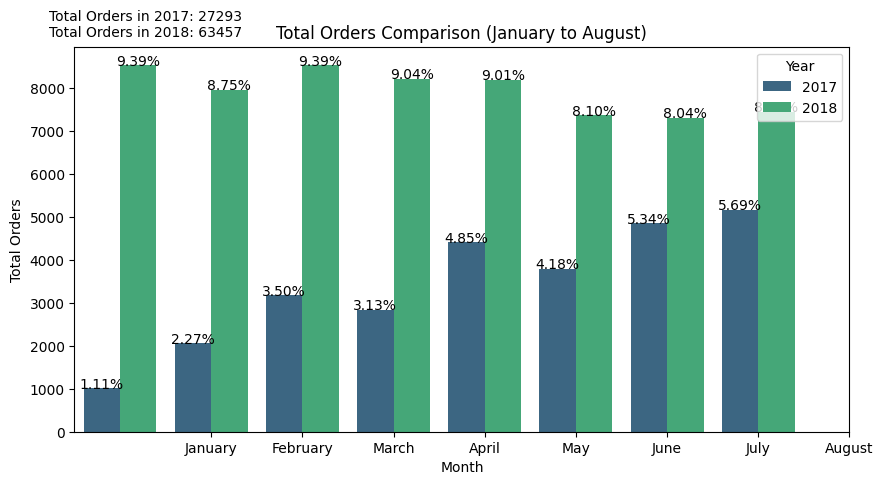

In [8]:
# Extract year and month from order_purchase_timestamp
ecommerce['order_purchase_year'] = ecommerce['order_purchase_timestamp'].dt.year
ecommerce['order_purchase_month'] = ecommerce['order_purchase_timestamp'].dt.month

# Filter data for the specified time period (January to August) and years (2017 and 2018)
filtered_data = ecommerce[(ecommerce['order_purchase_year'].isin([2017, 2018])) & (ecommerce['order_purchase_month'] <= 8)]

# Count of orders per month and year
orders_by_month_year = filtered_data.groupby(['order_purchase_year', 'order_purchase_month']).size().reset_index(name='total_orders')

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='order_purchase_month', y='total_orders', hue='order_purchase_year', data=orders_by_month_year, palette='viridis')
plt.title('Total Orders Comparison (January to August)')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.xticks(ticks=range(1, 9), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])
plt.legend(title='Year')

# Calculate total orders for each year
total_orders_2017 = orders_by_month_year[orders_by_month_year['order_purchase_year'] == 2017]['total_orders'].sum()
total_orders_2018 = orders_by_month_year[orders_by_month_year['order_purchase_year'] == 2018]['total_orders'].sum()

# Add a textbox with the total orders for each year
textbox_str = f"Total Orders in 2017: {total_orders_2017}\nTotal Orders in 2018: {total_orders_2018}"
plt.gcf().text(0.1, 0.9, textbox_str, fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))


# Add percentage text on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height / len(filtered_data) * 100:.2f}%', ha='center')


plt.show()



### Pertanyaan 2:

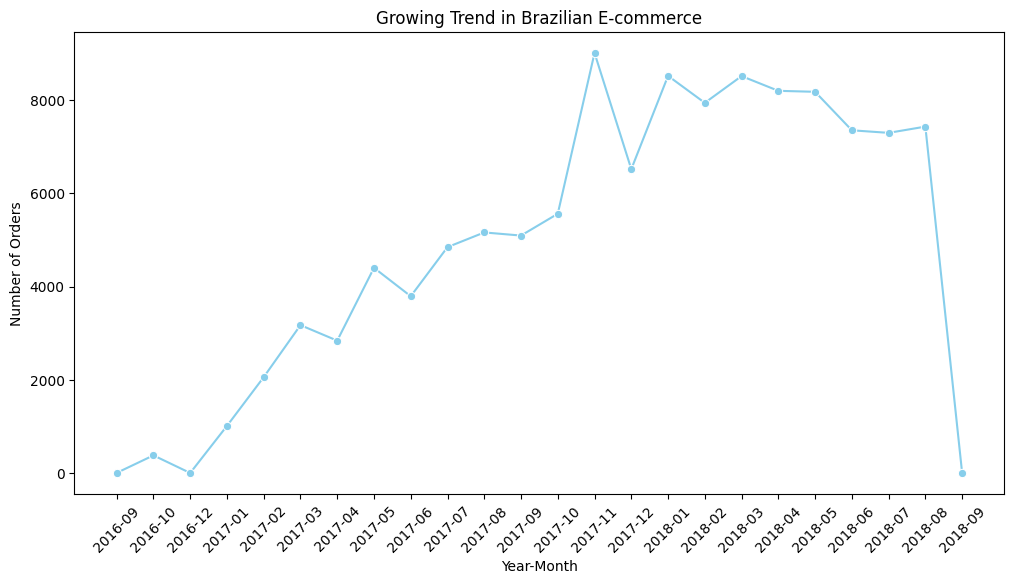

In [9]:
# Extract year and month from order_purchase_timestamp
ecommerce['order_purchase_year_month'] = ecommerce['order_purchase_timestamp'].dt.to_period('M')

# Count of orders per month
order_trend = ecommerce['order_purchase_year_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=order_trend.index.astype(str), y=order_trend.values, marker='o', color='skyblue')
plt.title('Growing Trend in Brazilian E-commerce')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3:

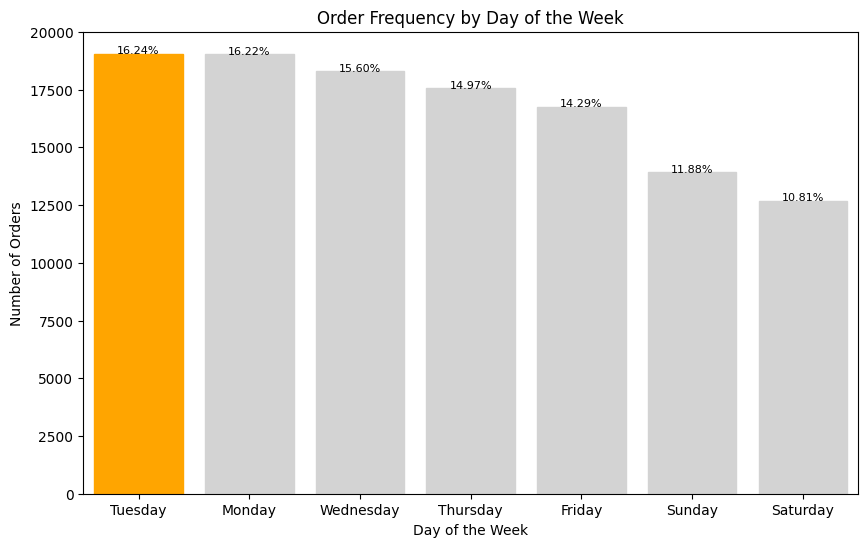

In [10]:
# Extract day of the week from order_purchase_timestamp
ecommerce['order_purchase_day_of_week'] = ecommerce['order_purchase_timestamp'].dt.day_name()
# Count of orders per day of the week
day_of_week_order = ecommerce['order_purchase_day_of_week'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_of_week_order.index, y=day_of_week_order.values, palette='viridis')

# Highlight the bar with the highest count
max_count_index = day_of_week_order.idxmax()
for bar in ax.patches:
    if bar.get_height() == day_of_week_order[max_count_index]:
        bar.set_color('orange')  # Change color for the highest bar
    else:
        bar.set_color('lightgray')  # Set other bars to light or blurry color

plt.title('Order Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Add percentage text on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height / len(ecommerce) * 100:.2f}%', ha='center', fontsize=8)

plt.show()


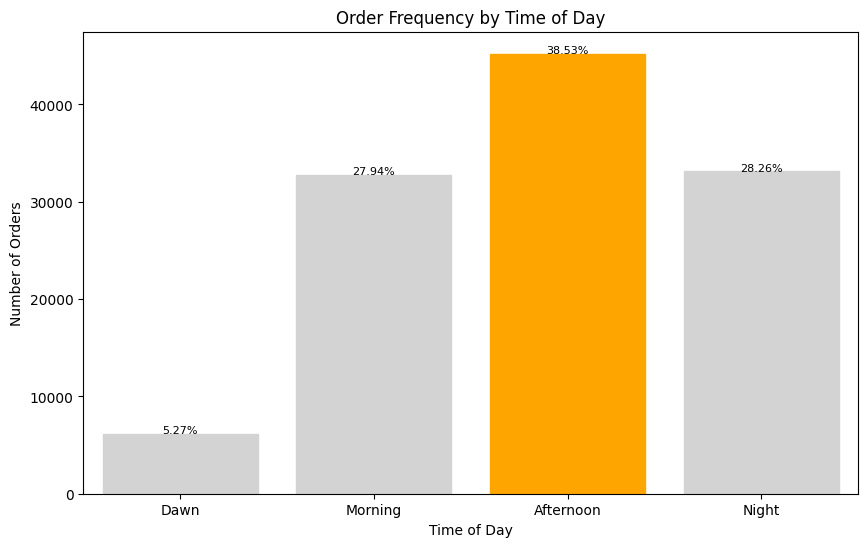

In [11]:
# Define time of day categories
time_of_day_bins = [0, 6, 12, 18, 24]
time_of_day_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
# Extract hour from order_purchase_timestamp
ecommerce['order_purchase_hour'] = ecommerce['order_purchase_timestamp'].dt.hour

# Categorize the hours
ecommerce['time_of_day'] = pd.cut(ecommerce['order_purchase_hour'], bins=time_of_day_bins, labels=time_of_day_labels, include_lowest=True)

# Count of orders per time of day
time_of_day_order = ecommerce['time_of_day'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=time_of_day_order.index, y=time_of_day_order.values, palette='viridis')

# Highlight the bar with the highest count
max_count_index = time_of_day_order.idxmax()
for bar in ax.patches:
    if bar.get_height() == time_of_day_order[max_count_index]:
        bar.set_color('orange')  # Change color for the highest bar
    else:
        bar.set_color('lightgray')  # Set other bars to light or blurry color

plt.title('Order Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')

# Add percentage text on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height / len(ecommerce) * 100:.2f}%', ha='center', fontsize=8)

plt.show()


### Pertanyaan 4:

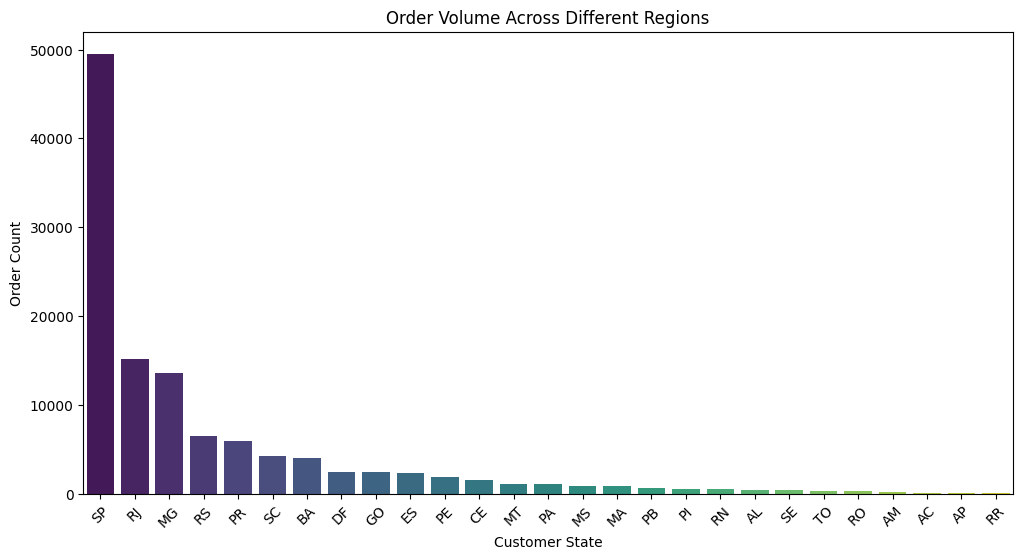

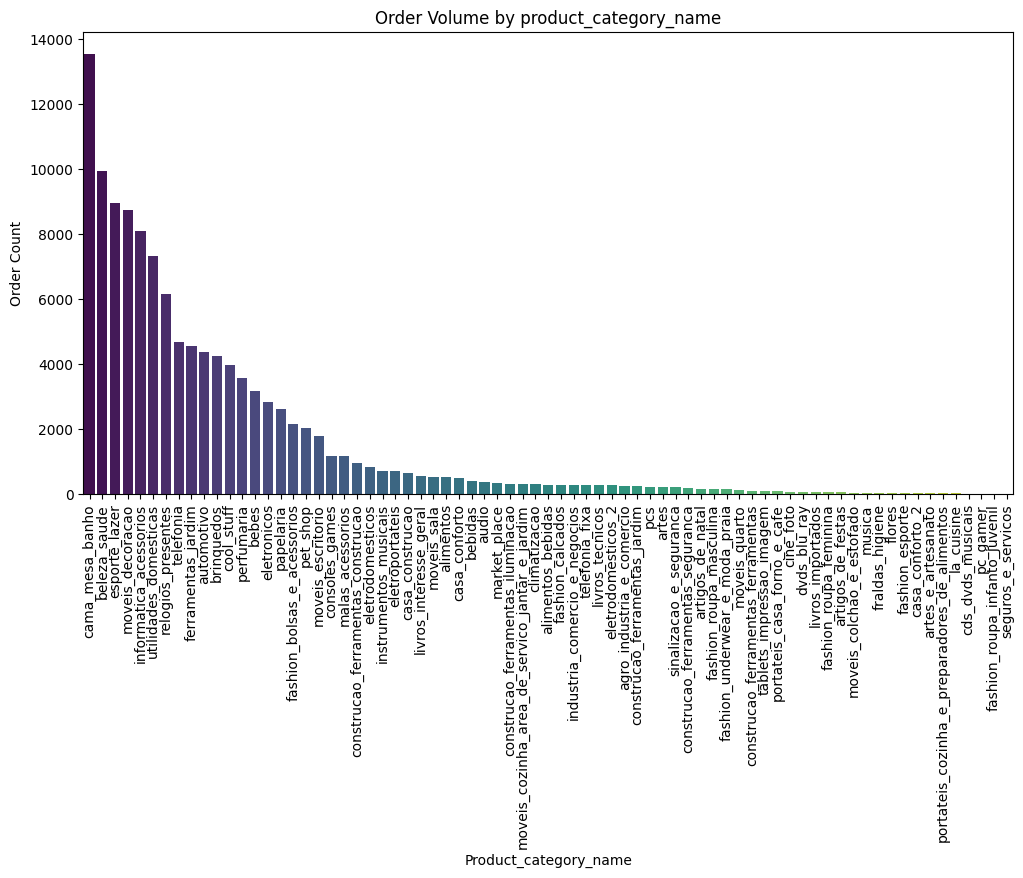

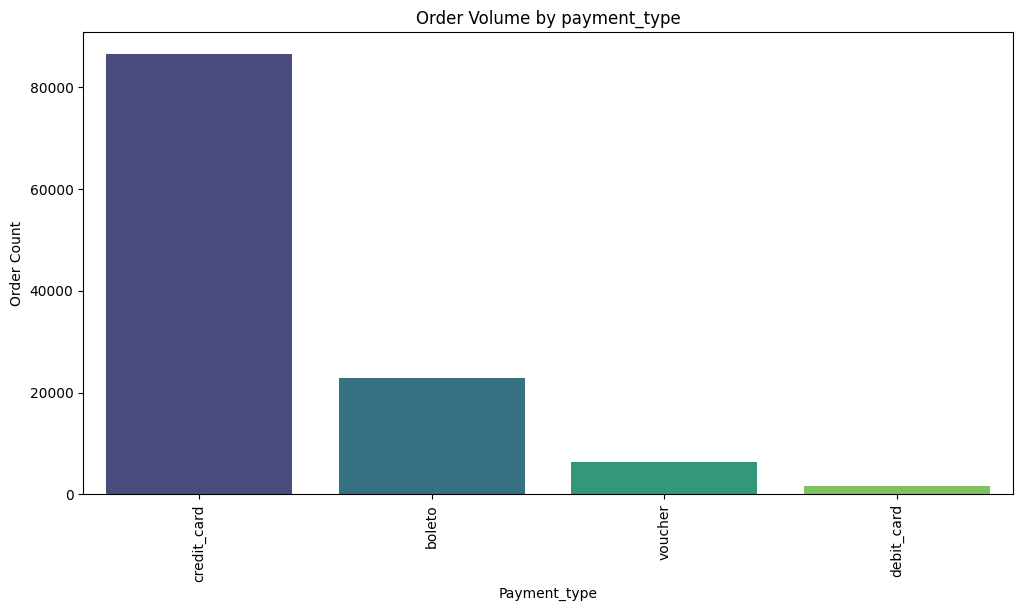

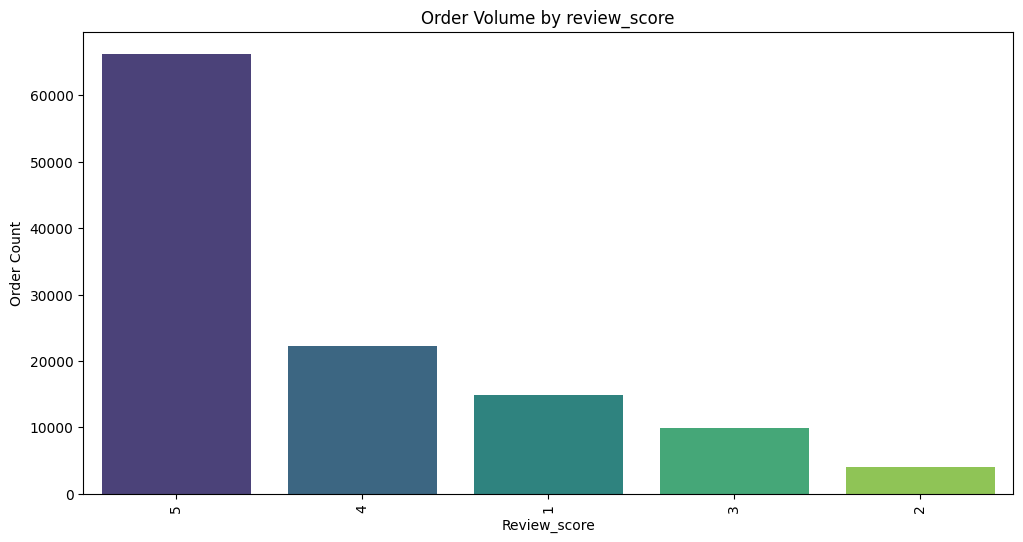

In [12]:
# Plot order volume across different regions
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_state', data=ecommerce, palette='viridis', order=ecommerce['customer_state'].value_counts().index)
plt.title('Order Volume Across Different Regions')
plt.xlabel('Customer State')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

# Explore factors contributing to order frequency
factors = ['product_category_name', 'payment_type', 'review_score']

for factor in factors:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=factor, data=ecommerce, palette='viridis', order=ecommerce[factor].value_counts().index)
    plt.title(f'Order Volume by {factor}')
    plt.xlabel(factor.capitalize())
    plt.ylabel('Order Count')
    plt.xticks(rotation=90)
    plt.show()

## Conclusion

- Conclution pertanyaan :

1. Total Orders Comparison (January to August):
The total number of orders increased significantly from **2017 to 2018**.
In 2017, there were **27.293** orders.
In 2018, the number of orders rose to **63.457** in percentage is **132.5% growth increase**, indicating substantial growth.

2. Growing Trend in Brazilian E-commerce:
The line plot suggests **a peak in November 2017**, indicating a surge in orders during that month. **A decline in order volume is observed in September 2018**, marking a period of lower activity.Order Frequency by Day of the Week:

3. **Tuesday and Monday** have the highest order frequency, with a slight difference.**Tuesday has a slightly higher order percentage (16.24%)** compared **to Monday (16.22%)**. **Order Frequency by Time of Day:
Afternoon shows the highest order frequency**, accounting for **38.53%** of the total orders.

4. Average Order Delivery Time Across Different Regions:**São Paulo has the shortest average order delivery time, taking around 6 days.**

  - Order Volume Across Different Regions:**São Paulo has the highest order volume**, with almost **49,000 orders**.
Explore Factors Contributing to Order Frequency:

  - Product Category (**cama_mesa_banho**): This category has the most products and the highest order count, with almost **14,000 orders**.

  - Payment Type (**Credit Card**): The majority of customers (**almost 100.000 Customer**) prefer using **credit cards** for transactions.

  - Review Score (**Rating 5**): Orders with a rating score of 5 dominate the business, indicating high customer satisfaction.